<a href="https://colab.research.google.com/github/jrleonett/visioncomputacional/blob/main/visioncomputacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visión Computacional

Este pequeño ejemplo de como usar la clasificación de imágenes con Python, Jupyter Notebook y Gluon-CV.-
Tomé como base a http://www.klaushaller.net/?page_id=1058  

In [1]:
pip install mxnet gluoncv matplotlib

In [13]:
# definimos las variables e importamos las librerias
import mxnet as mx
import gluoncv as gcv
import matplotlib.pyplot as plt

# se carga la libreria de imagenes
image1_url = 'https://miro.medium.com/max/720/0*BgnrYWbi8gzY8efw.jpg'
image2_url = 'https://pbs.twimg.com/media/D_uTU6WWsAA6Pbn.jpg'
image3_url = 'https://viajes.nationalgeographic.com.es/medio/2015/11/05/ca5327b6logo_grindjessee_1000x666.jpg'
image4_url = 'https://www.mumm.com/wp-content/uploads/2020/10/Grand-Cordon-Rose-Behind-Cuvee.jpg'
image5_url = 'https://m.media-amazon.com/images/I/91ZOeel75kL._SS500_.jpg'

images_url= [image1_url, image2_url, image3_url, image4_url, image5_url]

images=[]

for i in range(len(images_url)):
    gcv.utils.download(url=images_url[i], path='imagedownload0'+str(i)) 
    images.append(mx.image.imread('imagedownload0'+str(i))) 
print('Image download completed.')

# procesando las imagenes
images_prepared=[]
for i in range(len(images)):
  images_prepared.append(gcv.data.transforms.presets.imagenet.transform_eval(images[i]))

  pretrainedNN = gcv.model_zoo.get_model('densenet201', pretrained=True)
top3classes=[]
for i in range(len(images_prepared)):
    top3classes.append(mx.nd.topk(mx.nd.softmax(pretrainedNN(images_prepared[i])), k=3)[0])


100%|██████████| 61/61 [00:00<00:00, 9834.81KB/s]


100%|██████████| 105/105 [00:00<00:00, 20407.87KB/s]


124KB [00:00, 4145.26KB/s]             


100%|██████████| 52/52 [00:00<00:00, 14553.84KB/s]


100%|██████████| 38/38 [00:00<00:00, 14395.19KB/s]


Image download completed.


# Zona de resultados

Picture 1
# 1 Detected object:  amphibian
# 2 Detected object:  catamaran
# 3 Detected object:  crane


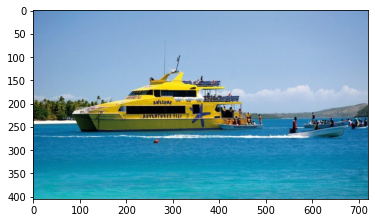

In [17]:
# Imprime la imagen 01 identificandola
print('Picture 1')
plt.imshow(images[0].asnumpy())
for i in range(3):
    index=top3classes[0][i].astype('int').asscalar()
    label=pretrainedNN.classes[index]
    print('#',i+1, 'Detected object: ', label)


In [ ]:
# Imprime la imagen 02 identificandola
print('Picture 2')
plt.imshow(images[1].asnumpy())
for i in range(3):
    index=top3classes[1][i].astype('int').asscalar()
    label=pretrainedNN.classes[index]
    print('#',i+1, 'Detected object: ',label)

Picture 3
# 1 Detected object:  alp
# 2 Detected object:  volcano
# 3 Detected object:  lakeside


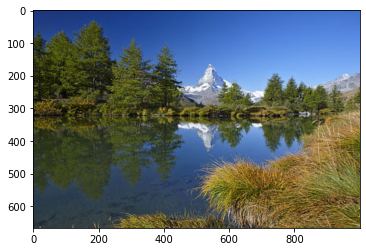

In [14]:
print('Picture 3')
plt.imshow(images[2].asnumpy())
for i in range(3):
    index=top3classes[2][i].astype('int').asscalar()
    label=pretrainedNN.classes[index]
    print('#',i+1, 'Detected object: ',label)

Picture 4
# 1 Detected object:  red wine
# 2 Detected object:  perfume
# 3 Detected object:  wine bottle


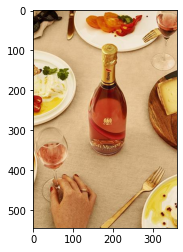

In [15]:
print('Picture 4')
plt.imshow(images[3].asnumpy())
for i in range(3):
    index=top3classes[3][i].astype('int').asscalar()
    label=pretrainedNN.classes[index]
    print('#',i+1, 'Detected object: ',label)
  

Picture 5
# 1 Detected object:  drumstick
# 2 Detected object:  web site
# 3 Detected object:  matchstick


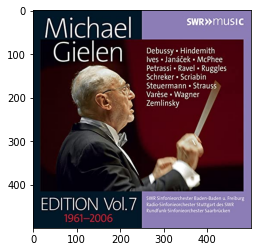

In [16]:
print('Picture 5')
plt.imshow(images[4].asnumpy())
for i in range(3):
    index=top3classes[4][i].astype('int').asscalar()
    label=pretrainedNN.classes[index]
    print('#',i+1, 'Detected object: ',label)